In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/sakshisinghal936/eda_data_science_course/main/scholarship.csv"
data = pd.read_csv(url)
df = data.copy()

In [2]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


# Z Score

C:\Users\bhang\AppData\Local\Temp\ipykernel_17396\670712352.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["semester_percentage"])
C:\Users\bhang\AppData\Local\Temp\ipykernel_17396\670712352.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])
C:\Users\bhang\

<Axes: xlabel='got_scholarship', ylabel='Density'>

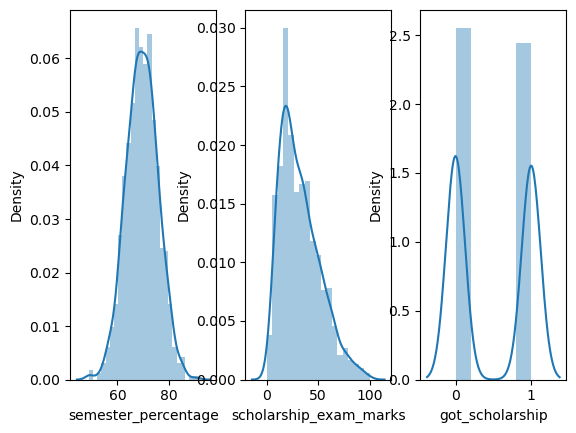

In [17]:
plt.subplot(1,3,1)
sns.distplot(df["semester_percentage"])
plt.subplot(1,3,2)
sns.distplot(df["scholarship_exam_marks"])
plt.subplot(1,3,3)
sns.distplot(df["got_scholarship"])

In [27]:
mean = df["semester_percentage"].mean()
std = df["semester_percentage"].std()

In [29]:
print(mean,",",std)

69.6124 , 6.158978751323897


In [31]:
min = mean - 3*std
max = mean + 3*std

In [33]:
print(min,",",max)

51.13546374602831 , 88.08933625397168


In [43]:
df["semester_percentage"] = np.where(df["semester_percentage"] > max, max, np.where(df["semester_percentage"]< min, min, df["semester_percentage"]))

# Interquartile Range

C:\Users\bhang\AppData\Local\Temp\ipykernel_17396\831898347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

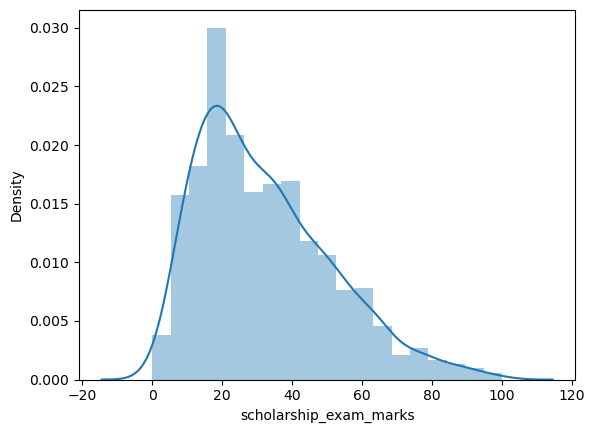

In [60]:
sns.distplot(df["scholarship_exam_marks"])

In [62]:
Q1 = df["scholarship_exam_marks"].quantile(0.25)
Q3 = df["scholarship_exam_marks"].quantile(0.75)

In [64]:
IQR = Q3 - Q1

In [66]:
max_exam_marks = Q3 + 1.5 * IQR
min_exam_marks = Q1 - 1.5 * IQR

In [70]:
print(Q1,",",Q3)
print(IQR)
print(max_exam_marks,",",min_exam_marks)

17.0 , 44.0
27.0
84.5 , -23.5


In [72]:
df[(df["scholarship_exam_marks"] < min_exam_marks) | (df["scholarship_exam_marks"] > max_exam_marks)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


# Percentile

In [74]:
url2 = "https://raw.githubusercontent.com/sakshisinghal936/eda_data_science_course/main/weight-height.csv"
data2 = pd.read_csv(url2)
df2 = data2.copy()

In [76]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\bhang\AppData\Local\Temp\ipykernel_17396\426827464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Height"])


<Axes: xlabel='Height', ylabel='Density'>

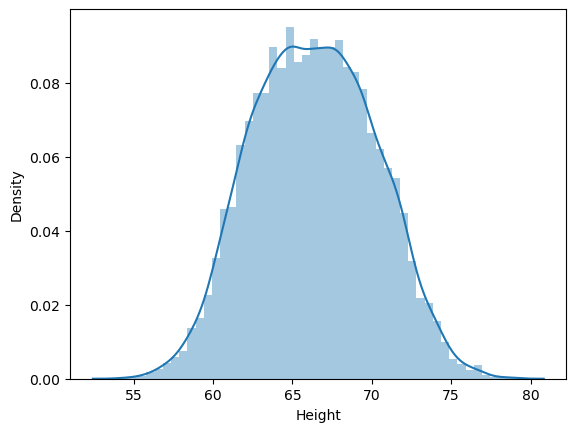

In [78]:
sns.distplot(df2["Height"])

In [80]:
min_height = df2["Height"].quantile(0.01)
max_height = df2["Height"].quantile(0.90)

In [82]:
df2[(df2["Height"] < min_height) | (df2["Height"] > max_height)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
11,Male,71.640805,213.741169
16,Male,72.418317,196.028506
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [87]:
df2["Height"] = np.where(df2["Height"]>max_height, max_height, np.where(df2["Height"]<min_height, min_height, df2["Height"]))

In [89]:
df2[(df2["Height"] < min_height) | (df2["Height"] > max_height)]

,Gender,Height,Weight
